In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from data.utils import get_statistics, load_dataset

In [2]:
plt.style.use("ggplot")

## Lundar Lander

*"An episode is considered a solution if it scores at least 200 points."* ~ [Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/).

In [3]:
train_set = load_dataset("LunarLander-v3-train.pt")
stats = get_statistics(train_set)
mean_dataset_return = stats["mean-episode-return"]
print(stats)

{'n-episodes': 4500, 'n-steps': 2786043, 'mean-episode-return': 122.53850540618228, 'max-episode-return': 305.259824647622}


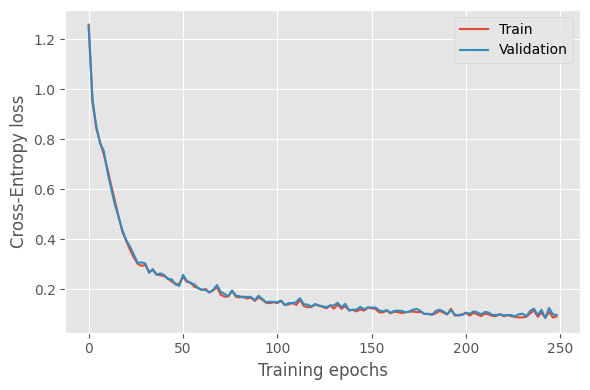

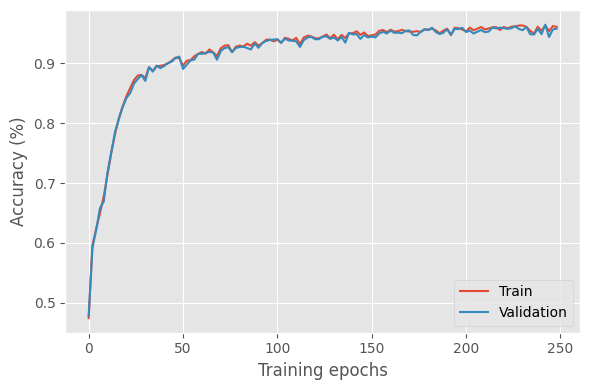

In [4]:
path_csv = "dt-lunarlander-v3-ctx20.pth-epochs250-report.csv"
data = pd.read_csv(path_csv)

labels = {"train_loss": "Train", "val_loss": "Validation", "train_acc": "Train", "val_acc": "Validation"}
ys = [["train_loss", "val_loss"], ["train_acc", "val_acc"]]
y_labels = ["Cross-Entropy loss", "Accuracy (%)"]

for i, y_label in enumerate(y_labels):
    fig, ax = plt.subplots(figsize=(6, 4))
    for y in ys[i]:
        ax.plot(data["epoch"], data[y], label=labels[y])
        ax.set_xlabel("Training epochs") 
        ax.set_ylabel(y_label)
        ax.legend()
    plt.tight_layout()
    plt.show()

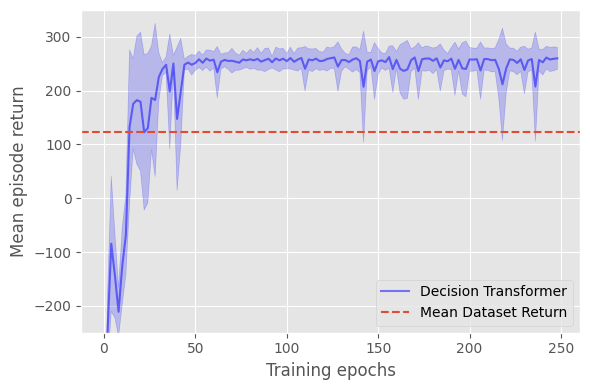

In [5]:
columns = [f"ep_return_run_{i}" for i in range(5)]
episode_returns = data[columns].to_numpy()

Y_LIM = -250
Y_MAX = 350

mean = episode_returns.mean(axis=1)
std = episode_returns.std(axis=1)
lower = mean - std
upper = mean + std

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(data["epoch"], mean, label="Decision Transformer", color="b", alpha=0.5)
ax.fill_between(data["epoch"], lower, upper, alpha=0.2, color="b")

ax.axhline(y=mean_dataset_return, linestyle="--", label="Mean Dataset Return")

ax.set_xlabel("Training epochs")
ax.set_ylabel("Mean episode return")
ax.set_ylim(Y_LIM, Y_MAX)
ax.legend()

plt.tight_layout()
plt.show()

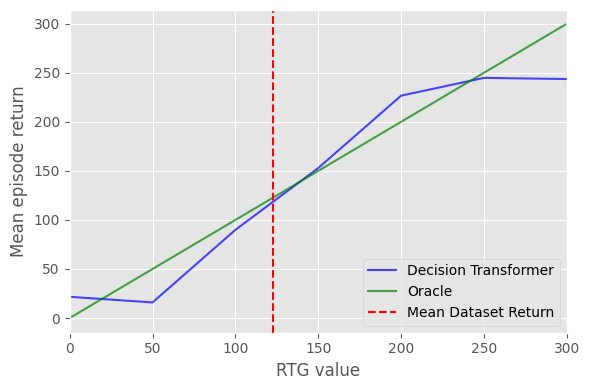

In [6]:
path_csv = "dt-lunarlander-v3-ctx20.pth-rollouts.csv"
data = pd.read_csv(path_csv)

rtgs = []
means = []
for rtg in data["target_rtg"].unique():
    df = data[data["target_rtg"] == rtg]
    mean = df["return"].mean()

    rtgs.append(rtg)
    means.append(mean)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(rtgs, means, color="b", alpha=0.7, label="Decision Transformer")
ax.plot(range(0, 300), range(0, 300), alpha=0.7, label="Oracle", color="g")
ax.axvline(mean_dataset_return, linestyle="--", color="r", label="Mean Dataset Return")

ax.set_xlabel("RTG value")
ax.set_ylabel("Mean episode return")
ax.set_xlim(0, 300)

ax.legend()
plt.tight_layout()
plt.show()